In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import utils

In [2]:
df = pd.read_csv('../data/LB804_train_pred.csv')

In [3]:
def predictionDist(y, yhat):
    sub = y.to_frame('y')
    sub['yhat'] = yhat
    y0 = sub[sub.y==0]
    y1 = sub[sub.y==1]
    y0.yhat.name = 'Actual:0'
    y0.yhat.plot(kind='kde',legend=True)
    y1.yhat.name = 'Actual:1'
    y1.yhat.plot(kind='kde',legend=True)
    plt.xlim(0,1)
    plt.xlabel('Probability of Event')
    plt.title('Prediction Distribution', fontsize=13, alpha=0.5)
    plt.show()


In [4]:
def feature_vs_y(feature, y, feature_name=None, kind='kde', bw_method=None, bins=100):
    
    if feature_name is None:
        feature_name = feature.name
    
    df = y.to_frame('y')
    df[feature_name] = feature
    y0 = df[df.y==0]
    y1 = df[df.y==1]
    y0[feature_name].name = 'Actual:0'
    y1[feature_name].name = 'Actual:1'
    if kind=='kde':
        y0[feature_name].plot(kind='kde', legend=True, bw_method=bw_method)
        y1[feature_name].plot(kind='kde', legend=True, bw_method=bw_method)
    elif kind=='hist':
        y0[feature_name].plot(kind='hist',legend=True, bins=bins)
        y1[feature_name].plot(kind='hist',legend=True, bins=bins)
        
    plt.xlabel(f'{feature_name}')
    plt.title(f'{feature_name} Distribution', fontsize=13, alpha=0.5)
    plt.show()

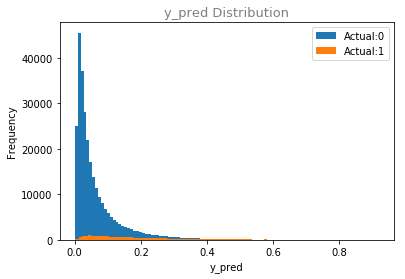

In [7]:
feature_vs_y(df.y_pred, df.y, kind='hist', bins=100)

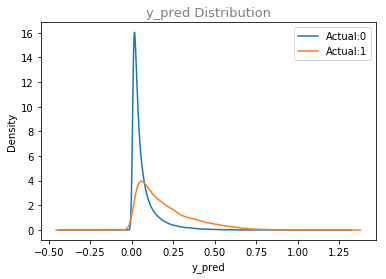

In [8]:
feature_vs_y(df.y_pred, df.y, kind='kde')

In [5]:
print(roc_auc_score(df.y, df.y_pred))

0.8042890838873323


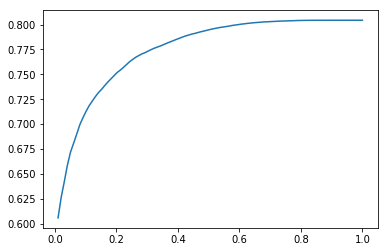

In [6]:
X = []
Y = []
for i in np.linspace(0,1,100):
    df_ = df[df.y_pred<i]
    if df_.shape[0]>3:
        X.append(i)
        Y.append(roc_auc_score(df_.y, df_.y_pred))
plt.plot(X, Y); plt.show()

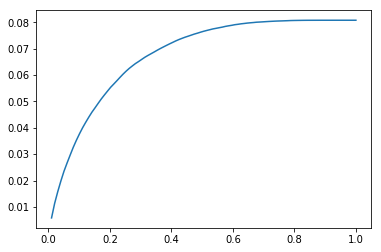

In [7]:
X = []
Y = []
for i in np.linspace(0,1,100):
    df_ = df[df.y_pred<i]
    if df_.shape[0]>3:
        X.append(i)
        Y.append(df_.y.mean())
plt.plot(X, Y); plt.show()

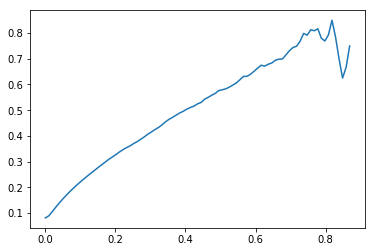

In [8]:
X = []
Y = []
for i in np.linspace(0,1,100)[::-1]:
    df_ = df[df.y_pred>i]
    if df_.shape[0]>3:
        X.append(i)
        Y.append(df_.y.mean())
plt.plot(X, Y); plt.show()

In [13]:
df[df.y_pred<0.1].shape, df[df.y_pred<0.1].y.mean()

((234942, 2), 0.037524154897804564)

In [14]:
df[df.y_pred<0.01].shape, df[df.y_pred<0.01].y.mean()

((29318, 2), 0.005764376833344703)

In [5]:
lr = LogisticRegression()

In [7]:
lr.fit(df[['y_pred']], df.y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
X_test = pd.read_csv('../data/LB804_test_pred.csv')

In [9]:
X_test.head()

,y_pred
0,0.035935
1,0.111796
2,0.018036
3,0.047114
4,0.139933


In [12]:
X_test['y_pred_lr'] = lr.predict_proba(X_test)[:, 1]

In [13]:
X_test

,y_pred,y_pred_lr
0,0.035935,0.045083
1,0.111796,0.079500
2,0.018036,0.039331
3,0.047114,0.049074
4,0.139933,0.097514
5,0.026047,0.041813
6,0.006335,0.035959
7,0.043883,0.047887
8,0.009755,0.036914
9,0.073341,0.059787


In [14]:
X_test.to_csv('../data/LB804_test_pred2.csv', index=False)

In [15]:
X_test.y_pred_lr.describe()

count    48744.000000
mean         0.069770
std          0.077432
min          0.034541
25%          0.038905
50%          0.045087
75%          0.063688
max          0.951885
Name: y_pred_lr, dtype: float64

In [16]:
X_test.y_pred_lr.quantile(0.1)

0.036638996706195644